# Ejemplo de uso de CNN
# en los datos de MNIST

leemos los datos

In [98]:
from tensorflow.keras.datasets import mnist

# descargamos separados en entrenamiento y tes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [99]:
# tamaño de los datos
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Vemos una imagen

5


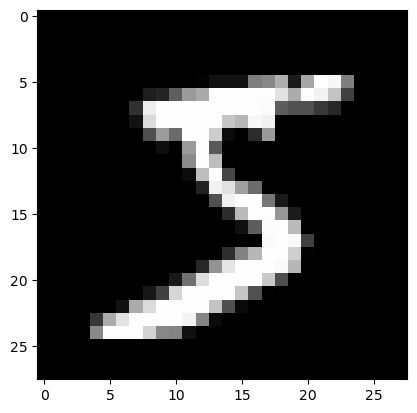

In [100]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[0,:,:],cmap='gray')

# Mostramos la etiqueta de la imagen
print(y_train[0])

Reordenamos los datos para que tengan 
(Nº muestras, alto, lado, canales)

In [101]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Separamos train y test

In [102]:
X_train = X_train[0:1000,:,:,:]
X_test = X_test[0:1000,:,:,:]
y_train = y_train[0:1000]
y_test = y_test[0:1000]

In [103]:
print(X_train.shape)
print(y_train.shape)

(1000, 28, 28, 1)
(1000,)


Hacemos el one-hot encoding a las salidas

In [104]:
from tensorflow.keras.utils import to_categorical

# me guardo los y_train antes de hacer el one-hot
y_train_old = y_train

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [105]:
print(y_train.shape)

(1000, 10)


In [106]:

y_train[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [107]:
# Lo que antes era 
print(y_train_old[0,])
# Ahora es
print(y_train[0,:])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Definimos el modelo

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D

# Usamos un modelo secuencial
model = Sequential()

# ponemos dos capas de convolución, una flatten y una densa
model.add(Conv2D(40, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(2))
model.add(Conv2D(30, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2))
#model.add(Conv2D(20, kernel_size=3, activation='relu'))
#model.add(Conv2D(32, kernel_size=7, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [109]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 40)        400       
                                                                 
 dropout_7 (Dropout)         (None, 26, 26, 40)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 40)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 30)        10830     
                                                                 
 dropout_8 (Dropout)         (None, 11, 11, 30)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 30)         0         
 g2D)                                                 

Se compila el modelo poniendo el optimizador, la funcióón de perdidas y si queremos una métrica

In [110]:
from tensorflow.keras.optimizers import Adam

In [111]:
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy'],)

Entrenamos...

In [112]:
hist = model.fit(X_train, y_train, validation_split = 0.1, epochs=30)

Epoch 1/30
29/29 [==============================] - 2s 54ms/step - loss: 38.1455 - categorical_accuracy: 0.2867 - val_loss: 2.1130 - val_categorical_accuracy: 0.6300
Epoch 2/30
29/29 [==============================] - 1s 41ms/step - loss: 8.1769 - categorical_accuracy: 0.5022 - val_loss: 1.0815 - val_categorical_accuracy: 0.6800
Epoch 3/30
29/29 [==============================] - 1s 46ms/step - loss: 4.6253 - categorical_accuracy: 0.5789 - val_loss: 0.6564 - val_categorical_accuracy: 0.8400
Epoch 4/30
29/29 [==============================] - 1s 36ms/step - loss: 3.1150 - categorical_accuracy: 0.6689 - val_loss: 0.6223 - val_categorical_accuracy: 0.8100
Epoch 5/30
29/29 [==============================] - 2s 54ms/step - loss: 2.5176 - categorical_accuracy: 0.6644 - val_loss: 0.6943 - val_categorical_accuracy: 0.7800
Epoch 6/30
29/29 [==============================] - 1s 48ms/step - loss: 2.0967 - categorical_accuracy: 0.6922 - val_loss: 0.5232 - val_categorical_accuracy: 0.8700
Epoch 7/3

Evaluamos en test

In [118]:
score = model.evaluate(X_test,y_test)
score

32/32 [==============================] - 0s 5ms/step - loss: 0.2838 - categorical_accuracy: 0.9160


[0.28375929594039917, 0.9160000085830688]

Ploteamos la evolución

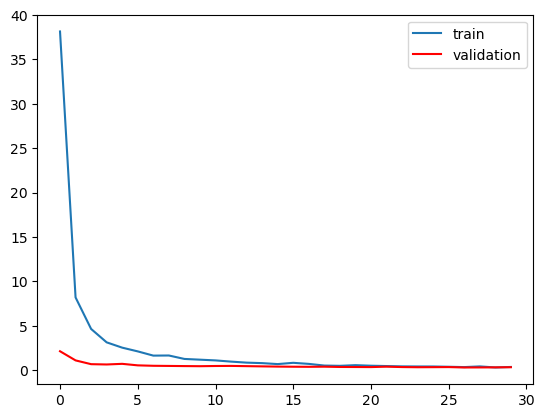

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],'r',label='validation')
plt.legend()


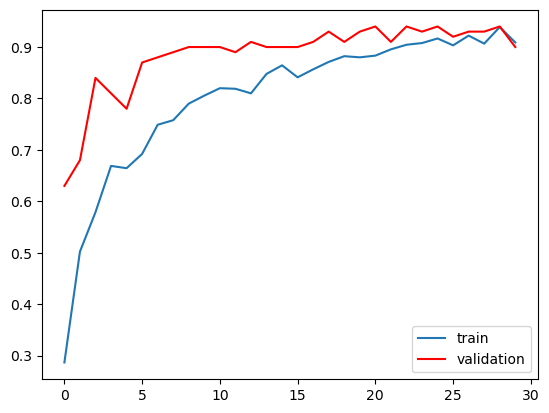

In [120]:
# Evolucion en accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['categorical_accuracy'],label='train')
plt.plot(hist.history['val_categorical_accuracy'],'r',label='validation')
plt.legend()


# Aplicamos en test

In [121]:
# Predecimos en test
preds_test = model.predict(X_test)

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 7ms/step


['p(y=0|x) = 0.0018', 'p(y=1|x) = 0.0335', 'p(y=2|x) = 0.0197', 'p(y=3|x) = 0.1933', 'p(y=4|x) = 0.1656', 'p(y=5|x) = 0.1895', 'p(y=6|x) = 0.1686', 'p(y=7|x) = 0.0253', 'p(y=8|x) = 0.0945', 'p(y=9|x) = 0.1084']


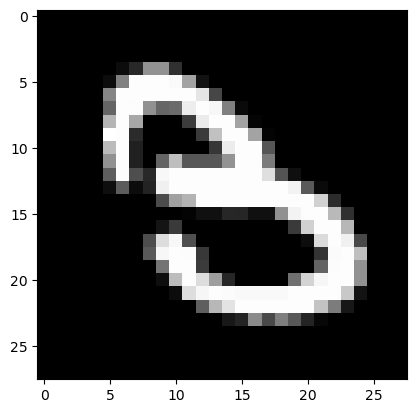

In [122]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 18
# Mostramos la imagen
plt.imshow(np.squeeze(X_test[idx_mostrar,:,:,]),cmap="gray")
# Mostramos las probabilidades que da el modelo a cada clase
print(["p(y=%d|x) = %.4f"%(i,p) for i,p in enumerate(preds_test[idx_mostrar])])